# MCMC

In [1]:
import numpy as np
from scipy.stats import poisson, norm
import random
from scipy import interpolate


from math import factorial, e

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

# Problem 1 

Coding up metropolis hastings to sample poisson distribution then compare to the actual PDF of Poisson using a histogram of 1e^6

I use the method that was shown in class for the Zipf distribution. I alter the function f to make the poisson distribution. Also, I change the alpha i,j

In [8]:
def poisson_mh(T, lmbda=5, burn_in=1000):
    
    samples = np.empty(T, dtype=int)
    proposed_step = 1 - 2*np.random.randint(0,2, T)
    decision = np.random.uniform(0, 1, T)
    
    # randomly pick the starting state
    samples[0] = random.randint(1, 10)
    
    for t in range(T-1):
        proposal = max(samples[t] + proposed_step[t], 1)
        #poisson pdf 
        f = lambda k: lmbda**k * np.exp(-lmbda) / factorial(k)
        #deciding to accept or reject based on aij
        if decision[t] >= f(proposal) / f(samples[t]):
            samples[t+1] = samples[t]
        else:
            samples[t+1] = proposal
            
    return samples[burn_in:]

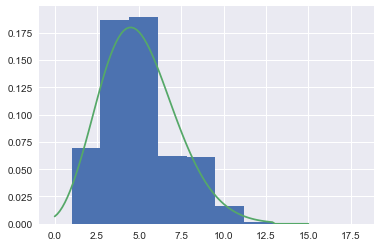

In [29]:
#using the metropolis hastings obtaining 1 million draws plot the histogram
draws = poisson_mh(1000000, lmbda=5, burn_in=1000)
plt.hist(draws, normed=True)

#getting the actual distribution and plotting as a line
x = range(0,14)
prob = poisson.pmf(x, 5)
l = np.linspace(0,15,100)
s = interpolate.spline(x, prob, l)
plt.plot(l,s)

plt.show()

# Problem 2

Coding up metropolis hastings to sample truncated normal distribution (m=1/3, sigma =1/4) then compare to the actual PDF of the normal using a histogram of 1e^6

I follow the example used in class on the beta distribution, but alter the pdf for the normal

In [18]:
def normal_mh(T, mu, sigma, burn_in=1000, ):
    #code up the normal pdf
    def normal(x, mu, sigma):
        return 1./np.sqrt(2*np.pi*sigma) * np.exp(-((x-mu)**2)/(2*sigma**2))
    
    #because this is continuous we can make a state sequence up front and then alter it based on the aij
    state_seq = np.random.uniform(0, 1, T)
    #set up the criteria for deciding whether to accept the proposal or not
    coin_flip = np.random.uniform(0, 1, T)
    
    #Now run through the chain updating our state_seq if alpha i,j is greater than the randomly chosen criteria
    for t in range(T-1):
        if coin_flip[t] >= normal(state_seq[t+1], mu, sigma) / normal(state_seq[t], mu, sigma):
            state_seq[t+1] = state_seq[t]
            
    return state_seq[burn_in:]

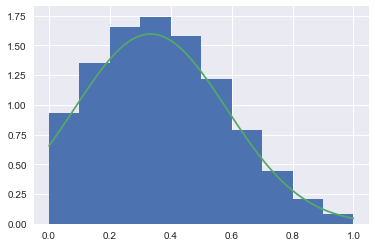

In [30]:
#1 million draws from my metropolis hastings then plot the histogram of those draws and plot the actual pdf line
draws = normal_mh(1000000, 1./3, 1./4)
plt.hist(draws, normed = True)

#plot the actual pdf of the truncated normal with a green line
x_vals = np.linspace(0,1,100)
y = norm.pdf(x_vals, loc=1./3, scale=1./4)
plt.plot(x_vals, y)
plt.show()